In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
sample_submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [4]:
data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
testing_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Exploratory Data Analysis

In [5]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [8]:
print('Percentage of null data in the HomePlanet', end = ' ')
print(data['HomePlanet'].isna().sum() * 100/ float(len(data)), end = '%\n')
print('Percentage of null data in the CryoSleep', end = ' ')
print(data['CryoSleep'].isna().sum() * 100/ float(len(data)), end = '%\n')
print('Percentage of null data in the Cabin', end = ' ')
print(data['Cabin'].isna().sum() * 100/ float(len(data)), end = '%\n')
print('Percentage of null data in the Destination', end = ' ')
print(data['Destination'].isna().sum() * 100/ float(len(data)), end = '%\n')

Percentage of null data in the HomePlanet 2.312205222592891%
Percentage of null data in the CryoSleep 2.496261359714713%
Percentage of null data in the Cabin 2.289198205452663%
Percentage of null data in the Destination 2.093638559760727%


All the homeplanets and destinations which have nan will be subsituted by an variable 'UNK'

In [9]:
print(f"The amount of data which belongs to class True is {len(data[data['Transported'] == True])}")
print(f"The amount of data which belongs to class True is {len(data[data['Transported'] == False])}")


The amount of data which belongs to class True is 4378
The amount of data which belongs to class True is 4315


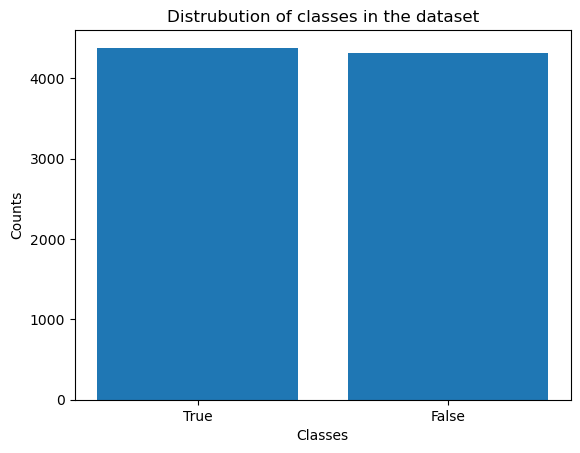

In [10]:
plt.title('Distrubution of classes in the dataset')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.bar(['True', 'False'], [len(data[data['Transported'] == True]), len(data[data['Transported'] == False])])
plt.show()

# ALMOST 50-50% distrubution so we can say that the dataset is not skewed towards any class

# FEATURE IMPORTANCE

The important features we have is Destination, HomePlanet, CryoSleep, VIP, Cabin

In [11]:
destination_set = set(data['Destination'])
destination_set

{'55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan}

In [12]:
homeplanet_set = set(data['HomePlanet'])
homeplanet_set

{'Earth', 'Europa', 'Mars', nan}

In [13]:
cryosleep_set = set(data['CryoSleep'])
cryosleep_set

{False, True, nan}

In [14]:
vip_set = set(data['VIP'])
vip_set

{False, True, nan}

In [15]:
cabin_set = list(set(data['Cabin']))
cabin_set[:10]


['F/768/P',
 'F/12/S',
 'F/243/S',
 'G/1310/P',
 'F/1399/P',
 'G/90/P',
 'F/1534/S',
 'G/667/P',
 'F/593/P',
 'C/275/S']

In [16]:
cabin_set[0].split('/')

['F', '768', 'P']

In [17]:
data['Cabin'].fillna('UNK', inplace = True)

As we can see from the above cabin set array. We can see that the cabin seat is in the form of cabin name, seat_number, seat_type. Therefore, we can separate the cabin feature into 3 parts and discard seat number. Seat number has huge values and causes unwanted bias in the training dataset due to its huge range.

In [18]:
def cabin_data_separation(data):
    cabin_name = []
    seat_type = []
    seat_num = []
    for i in range(len(data)):
        if data['Cabin'][i] == 'UNK':
            cabin_name.append('UNK')
            seat_num.append(0)
            seat_type.append('UNK')
        else:
            
            temp = data['Cabin'][i].split('/')
#             print(temp)
            cabin_name.append(temp[0])
            seat_num.append(temp[1])
            seat_type.append(temp[2])
            
    return cabin_name, seat_num, seat_type
        

In [19]:
cabin_name,seat_num, seat_type = cabin_data_separation(data)

In [20]:
print(f"Number of distinct cabin names {len(set(cabin_name))}")
print(f"Number of distinct seat types {len(set(seat_type))}")



Number of distinct cabin names 9
Number of distinct seat types 3


In [21]:
data['CabinName'] = cabin_name
data['SeatType'] = seat_type
data['SeatNumber'] = seat_num

In [22]:
del data['PassengerId']
del data['Name']

In [23]:
print(homeplanet_set)
print(destination_set)

{'Mars', 'Europa', nan, 'Earth'}
{nan, 'PSO J318.5-22', '55 Cancri e', 'TRAPPIST-1e'}


In [24]:
data['HomePlanet'].fillna('UNK', inplace = True)
data['Destination'].fillna('UNK', inplace = True)

We can see that how important the homeplanet and the destination are for the target variable Destination

In [25]:
group_counts = data.groupby('HomePlanet').size()
group_counts

HomePlanet
Earth     4602
Europa    2131
Mars      1759
UNK        201
dtype: int64

In [26]:
earth_data = data[data['HomePlanet'] == 'Earth']
europa_data = data[data['HomePlanet'] == 'Europa']
mars_data = data[data['HomePlanet'] == 'Mars']
unknown = data[data['HomePlanet'] == 'UNK']

Counts of Destination True or False based on the HomePlanet

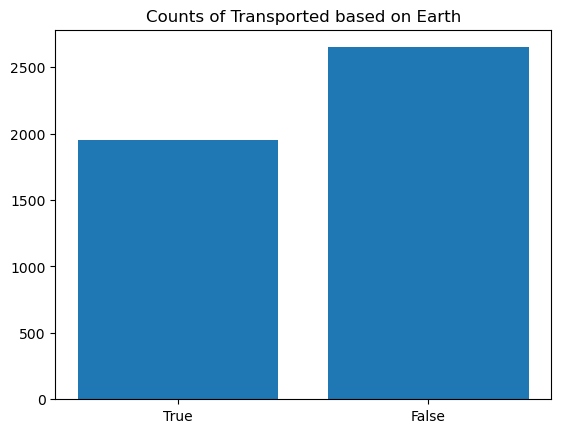

In [27]:
plt.title('Counts of Transported based on Earth')
plt.bar(['True', 'False'], [len(earth_data[earth_data['Transported'] == True]),len(earth_data[earth_data['Transported'] == False]) ])
plt.show()

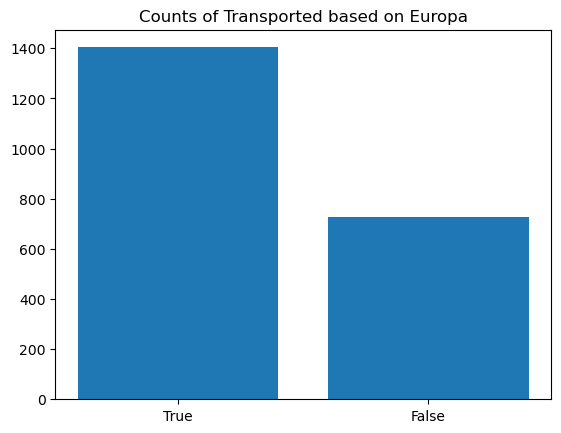

In [28]:
plt.title('Counts of Transported based on Europa')
plt.bar(['True', 'False'], [len(europa_data[europa_data['Transported'] == True]),len(europa_data[europa_data['Transported'] == False]) ])
plt.show()

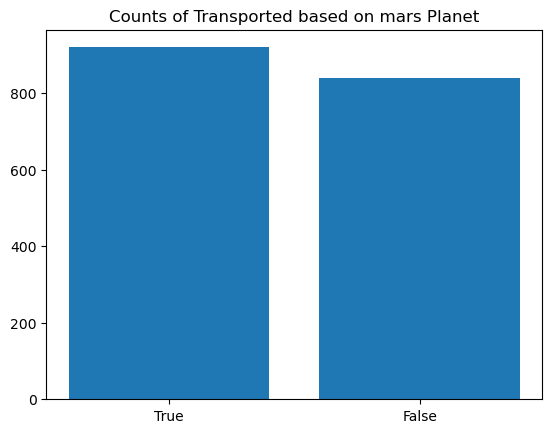

In [29]:
plt.title('Counts of Transported based on mars Planet')
plt.bar(['True', 'False'], [len(mars_data[mars_data['Transported'] == True]),len(mars_data[mars_data['Transported'] == False]) ])
plt.show()

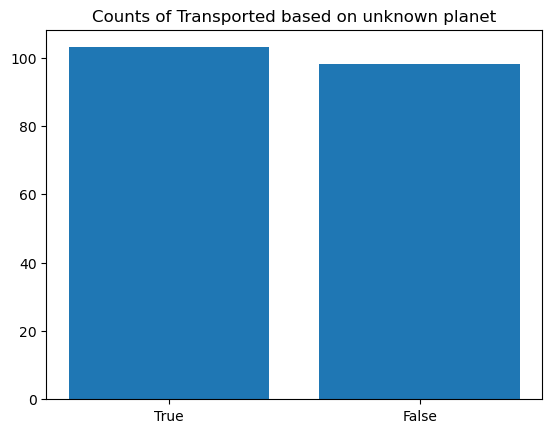

In [30]:
plt.title('Counts of Transported based on unknown planet')
plt.bar(['True', 'False'], [len(unknown[unknown['Transported'] == True]),len(unknown[unknown['Transported'] == False]) ])
plt.show()

Counts of Transported based on unique Destination planets

In [31]:
print(destination_set)

{nan, 'PSO J318.5-22', '55 Cancri e', 'TRAPPIST-1e'}


In [32]:
cancri_data = data[data['Destination'] == '55 Cancri e']
trappist_data = data[data['Destination'] == 'TRAPPIST-1e']
pso_data = data[data['Destination'] == 'PSO J318.5-22']
unk_data = data[data['Destination'] == 'UNK']

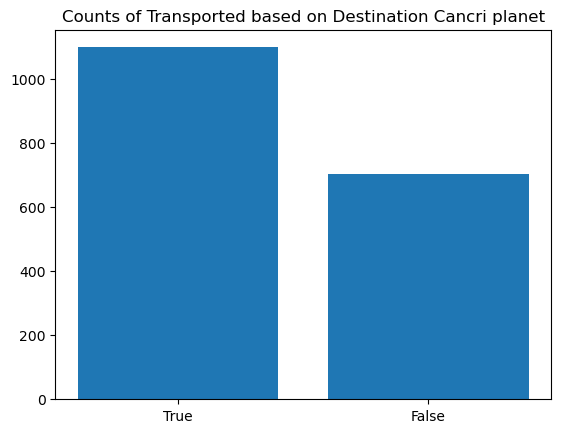

In [33]:
plt.title('Counts of Transported based on Destination Cancri planet')
plt.bar(['True', 'False'], [len(cancri_data[cancri_data['Transported'] == True]),len(cancri_data[cancri_data['Transported'] == False]) ])
plt.show()


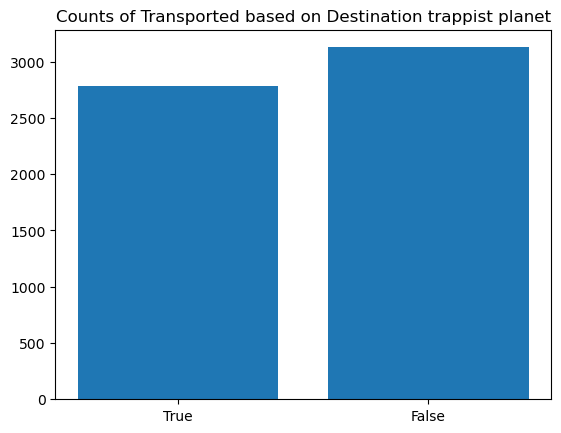

In [34]:
plt.title('Counts of Transported based on Destination trappist planet')
plt.bar(['True', 'False'], [len(trappist_data[trappist_data['Transported'] == True]),len(trappist_data[trappist_data['Transported'] == False]) ])
plt.show()


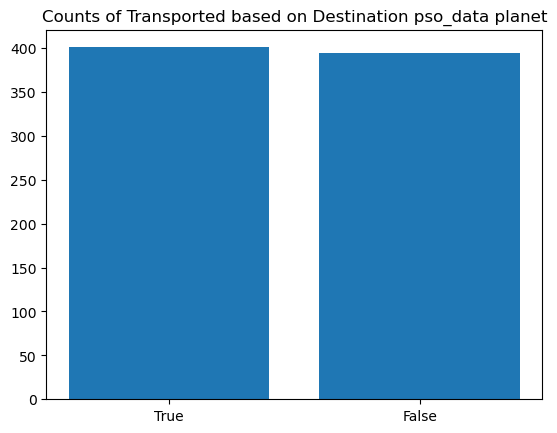

In [35]:
plt.title('Counts of Transported based on Destination pso_data planet')
plt.bar(['True', 'False'], [len(pso_data[pso_data['Transported'] == True]),len(pso_data[pso_data['Transported'] == False]) ])
plt.show()


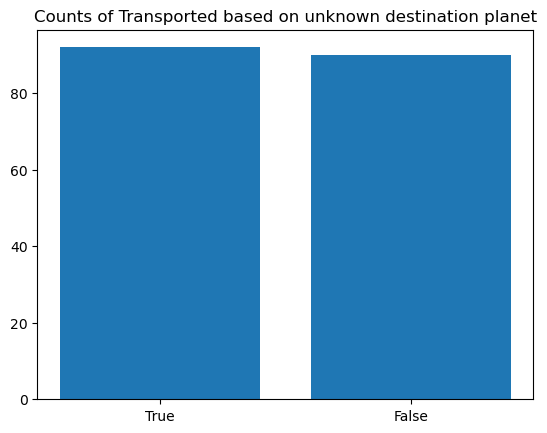

In [36]:
plt.title('Counts of Transported based on unknown destination planet')
plt.bar(['True', 'False'], [len(unk_data[unk_data['Transported'] == True]),len(unk_data[unk_data['Transported'] == False]) ])
plt.show()

# Based on Age

In [37]:
#Plotting the histogram of age vs Transported true and false

In [38]:
true_reached = data[data['Transported'] == True]
false_notreached = data[data['Transported'] == False]

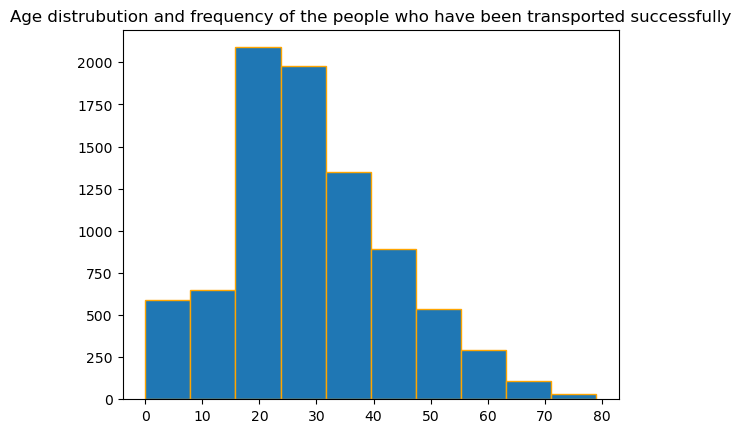

In [39]:
plt.hist(data['Age'], bins = 10, edgecolor = 'orange')
plt.title('Age distrubution and frequency of the people who have been transported successfully')
plt.show()


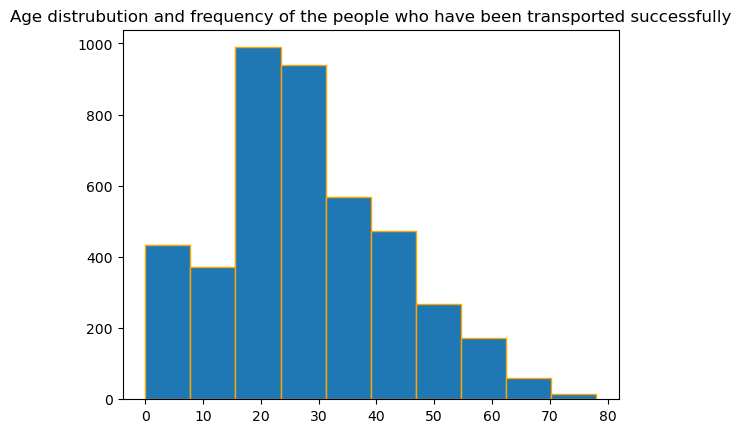

In [40]:
plt.hist(true_reached['Age'], bins = 10, edgecolor = 'orange')
plt.title('Age distrubution and frequency of the people who have been transported successfully')
plt.show()


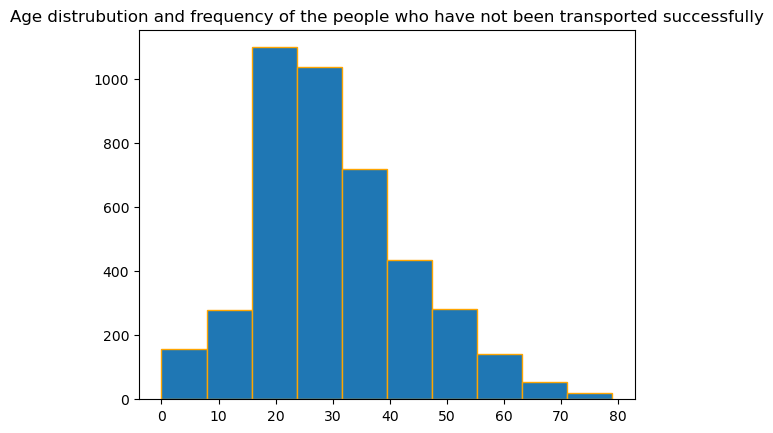

In [41]:
plt.hist(false_notreached['Age'], bins = 10, edgecolor = 'orange')
plt.title('Age distrubution and frequency of the people who have not been transported successfully')
plt.show()


From the above 2 graphs, we can see that the people between the age group's distribution based on Transported is almost similar. In the age group of 0-15, we can see that there are more transported successfully than unsucessful. In rest of the ranges, we can see that the number of people transported unsuccessfully has higher frequency. 

# EFFECT OF CRYOSLEEP

In [42]:
cryosleep_true = data[data['CryoSleep'] == True]
cryosleep_false = data[data['CryoSleep'] == False]

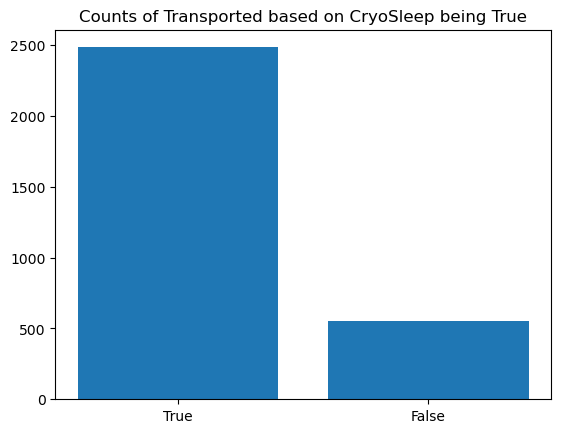

In [43]:
plt.title('Counts of Transported based on CryoSleep being True')
plt.bar(['True', 'False'], [len(cryosleep_true[cryosleep_true['Transported'] == True]),len(cryosleep_true[cryosleep_true['Transported'] == False]) ])
plt.show()

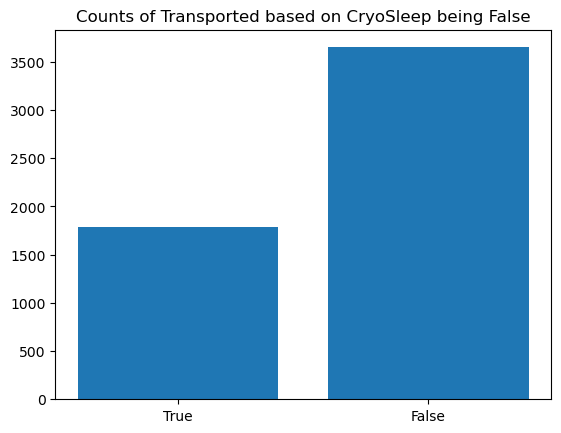

In [44]:
plt.title('Counts of Transported based on CryoSleep being False')
plt.bar(['True', 'False'], [len(cryosleep_false[cryosleep_false['Transported'] == True]),len(cryosleep_false[cryosleep_false['Transported'] == False]) ])
plt.show()

In [45]:
cryo_matrix = [[len(cryosleep_true[cryosleep_true['Transported'] == True]),len(cryosleep_true[cryosleep_true['Transported'] == False]) ],
               [len(cryosleep_false[cryosleep_false['Transported'] == True]),len(cryosleep_false[cryosleep_false['Transported'] == False]) ]]

In [46]:
cryo_matrix

[[2483, 554], [1789, 3650]]

From the above 2 graphs, we can see that if cryosleep is true, the transported % is more true and if it's false, it'% is more towards false. Therefore, cryoSleep is a very important feature

# HANDLING NAN VALUES

In [47]:
data['HomePlanet'].fillna('unk', inplace = True)
data['CryoSleep'].fillna(False, inplace = True)
data['Cabin'].fillna('unk', inplace = True)
data['Destination'].fillna('unk', inplace = True)
data['Age'].fillna(data['Age'].mean(skipna = True), inplace = True)
data['VIP'].fillna(False, inplace = True) 
data['RoomService'].fillna(0, inplace = True)
data['FoodCourt'].fillna(0, inplace = True)
data['ShoppingMall'].fillna(0, inplace = True)
data['Spa'].fillna(0, inplace = True)
data['VRDeck'].fillna(0, inplace = True)



In [48]:
del data['Cabin']

In [49]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinName,SeatType,SeatNumber
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P,98
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S,1499
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S,1500
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S,608


In [50]:
data.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinName       0
SeatType        0
SeatNumber      0
dtype: int64

In [51]:
training_data = data.copy()

# ENCODING THE CLASSES INTO NUMERICAL 

In [52]:
training_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'CabinName', 'SeatType', 'SeatNumber'],
      dtype='object')

In [53]:
from sklearn.preprocessing import LabelEncoder

encoder_cryo = LabelEncoder()
training_data['CryoSleep'] = encoder_cryo.fit_transform(training_data['CryoSleep'])
print(encoder_cryo.classes_)


encoder_dest = LabelEncoder()
training_data['Destination'] = encoder_dest.fit_transform(training_data['Destination'])
print(encoder_dest.classes_)

encoder_homeplanet = LabelEncoder()
training_data['HomePlanet'] = encoder_homeplanet.fit_transform(training_data['HomePlanet'])
print(encoder_homeplanet.classes_)

encoder_vip = LabelEncoder()
training_data['VIP'] = encoder_vip.fit_transform(training_data['VIP'])
print(encoder_vip.classes_)

encoder_cabname = LabelEncoder()
training_data['CabinName'] = encoder_cabname.fit_transform(training_data['CabinName'])
print(encoder_cabname.classes_)


encoder_seat = LabelEncoder()
training_data['SeatType'] = encoder_seat.fit_transform(training_data['SeatType'])
print(encoder_seat.classes_)



encoder_transported = LabelEncoder()
training_data['Transported'] = encoder_transported.fit_transform(training_data['Transported'])
print(encoder_transported.classes_)







[False  True]
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e' 'UNK']
['Earth' 'Europa' 'Mars' 'UNK']
[False  True]
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T' 'UNK']
['P' 'S' 'UNK']
[False  True]


In [54]:
training_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinName,SeatType,SeatNumber
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,1,0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0,98
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6,1,1499
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6,1,1500
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4,1,608


# SEPARATING THE TARGET AND THE FEATURES

In [55]:
target = training_data['Transported']


In [56]:
del training_data['Transported']

In [57]:
training_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinName,SeatType,SeatNumber
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,1,0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,98
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,6,1,1499
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,6,1,1500
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4,1,608


# Normalizing the continuous feature variables 

In [58]:
# numerical_df = training_data.iloc[:, 5:10]
# numerical_df

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,1872.0,1.0,0.0
8691,0.0,1049.0,0.0,353.0,3235.0


In [59]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# numerical_df = scaler.fit_transform(numerical_df)

In [60]:
# numerical_df = pd.DataFrame(numerical_df)
# numerical_df.columns = ['RoomService' , 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# numerical_df

In [61]:
# training_data['RoomService'] = numerical_df['RoomService']
# training_data['FoodCourt'] = numerical_df['FoodCourt']
# training_data['ShoppingMall'] = numerical_df['ShoppingMall']
# training_data['Spa'] = numerical_df['Spa']
# training_data['VRDeck'] = numerical_df['VRDeck']

In [62]:
training_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinName,SeatType,SeatNumber
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,1,0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,98
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,6,1,1499
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,6,1,1500
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4,1,608


Our final training data has total of 12 features. 
# Train test split for model training

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(training_data, target, test_size = 0.3, random_state = 42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(6085, 13) (2608, 13)
(6085,) (2608,)


# Models training

# KNN (HyperParameter tuning and best parameters)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7,  p = 2, n_jobs = -1)
knn.fit(x_train, y_train)



KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [65]:
y_pred = knn.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix

# Assuming you have predicted labels (y_pred) and true labels (y_true)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 926  363]
 [ 234 1085]]


In [67]:
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
precision = TP / float(TP+FP)
recall = TP / float(TP+FN)
print(precision, recall)

0.7493093922651933 0.8225928733889311


In [68]:
from sklearn.metrics import accuracy_score

# Assuming you have predicted labels (y_pred) and true labels (y_true)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7710889570552147


In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors' : [5,10,12,15,17,19,20,22,24],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10,20,30,40,50],
    'p' : [1,2],
    'n_jobs' : [-1]
}


In [70]:
# knn = KNeighborsClassifier()
# grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3)
# grid_result = grid.fit(training_data, target)
# print("Best parameters:", grid_result.best_params_)
# print("Best score:", grid_result.best_score_)


# Best KNN model with it's best parameters

In [71]:


knn = KNeighborsClassifier(n_neighbors = 19, weights = 'uniform', algorithm = 'auto', p = 1, n_jobs = -1, leaf_size = 10)
knn.fit(x_train, y_train)



KNeighborsClassifier(leaf_size=10, n_jobs=-1, n_neighbors=19, p=1)

In [72]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors = 17, weights = 'uniform', algorithm = 'auto', p = 2, n_jobs = -1, leaf_size = 50)
# knn.fit(x_train, y_train)


knn = KNeighborsClassifier(n_neighbors = 7, n_jobs = -1, p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [73]:
y_pred = knn.predict(x_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7710889570552147


# Decision Tree 

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [76]:
dt_clf = DecisionTreeClassifier( max_depth = 7)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7772239263803681


In [78]:

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5,6,7,8,9,10,11,12,13],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [2,3],
    'max_features': ['None', 'sqrt', 'log2']
}


In [79]:
# dt_clf = DecisionTreeClassifier()
# grid = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5)
# grid_result = grid.fit(training_data, target)
# print("Best parameters:", grid_result.best_params_)
# print("Best score:", grid_result.best_score_)


In [767]:
dt_clf = DecisionTreeClassifier( max_depth = 10,criterion = 'gini', max_features = 'log2', min_samples_split= 4, splitter = 'best',random_state = 42)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [768]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7515337423312883


# RANDOM FORESTS

In [82]:

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth' : [3,4,5,6,7,8, 9, 10],
    'max_features': ['None', 'sqrt', 'log2'],
    'n_jobs' : [-1],
    'random_state': [42]
    }


In [83]:
# import time

# s = time.time()

# rf_clf = RandomForestClassifier()
# grid = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)
# grid_result = grid.fit(training_data, target)
# print("Best parameters:", grid_result.best_params_)
# print("Best score:", grid_result.best_score_)

# e = time.time()

# print(f"Time taken to run this cell {e-s} ")


In [891]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth = 14, random_state = 42, n_estimators = 100, criterion = 'entropy', max_features = 'sqrt',  n_jobs = -1 )
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

In [892]:
rf_clf.score(x_train, y_train)

0.9559572719802794

In [893]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7975460122699386


# Model for UNKNOWN HOMEPLANET

In [788]:
home_unk = pd.concat([training_data, target], axis=1)

In [789]:
home_unk = home_unk[home_unk['HomePlanet'] == 3]

home_unk

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinName,SeatType,SeatNumber,Transported
59,3,1,2,33.0,0,0.0,0.0,0.0,0.0,0.0,4,1,3,1
113,3,0,2,39.0,0,0.0,2344.0,0.0,65.0,6898.0,0,0,0,0
186,3,1,0,24.0,0,0.0,0.0,0.0,0.0,0.0,3,0,6,1
225,3,0,2,18.0,0,313.0,1.0,691.0,283.0,0.0,5,1,46,0
234,3,1,0,54.0,0,0.0,0.0,0.0,0.0,0.0,2,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,3,0,2,25.0,0,1258.0,0.0,22.0,19.0,0.0,4,0,582,0
8613,3,0,0,53.0,0,0.0,4017.0,0.0,13.0,3147.0,4,1,603,0
8666,3,0,0,38.0,0,28.0,1208.0,973.0,207.0,0.0,5,1,1792,1
8674,3,0,2,13.0,0,39.0,0.0,1085.0,24.0,0.0,5,0,1892,0


In [790]:
target_unk = home_unk['Transported']
del home_unk['Transported']

In [791]:


unk_train, unk_test, y_unk_train, y_unk_test = train_test_split(home_unk, target_unk)

In [792]:
unk_train.shape, unk_test.shape

((150, 13), (51, 13))

In [872]:
rf_clf_unk = RandomForestClassifier(max_depth = 1, random_state = 42, n_estimators = 100, criterion = 'gini', max_features = 'log2',  n_jobs = -1 )
rf_clf_unk.fit(unk_train,y_unk_train)
y_pred = rf_clf_unk.predict(unk_test)

In [873]:
rf_clf_unk.score(unk_train, y_unk_train)

0.7733333333333333

In [874]:
accuracy = accuracy_score(y_unk_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7254901960784313


# MODEL FOR UNKNOWN DESTINATION

In [796]:
dest_unk = pd.concat([training_data, target], axis=1)

In [797]:
dest_unk = dest_unk[dest_unk['HomePlanet'] == 3]

dest_unk

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinName,SeatType,SeatNumber,Transported
59,3,1,2,33.0,0,0.0,0.0,0.0,0.0,0.0,4,1,3,1
113,3,0,2,39.0,0,0.0,2344.0,0.0,65.0,6898.0,0,0,0,0
186,3,1,0,24.0,0,0.0,0.0,0.0,0.0,0.0,3,0,6,1
225,3,0,2,18.0,0,313.0,1.0,691.0,283.0,0.0,5,1,46,0
234,3,1,0,54.0,0,0.0,0.0,0.0,0.0,0.0,2,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,3,0,2,25.0,0,1258.0,0.0,22.0,19.0,0.0,4,0,582,0
8613,3,0,0,53.0,0,0.0,4017.0,0.0,13.0,3147.0,4,1,603,0
8666,3,0,0,38.0,0,28.0,1208.0,973.0,207.0,0.0,5,1,1792,1
8674,3,0,2,13.0,0,39.0,0.0,1085.0,24.0,0.0,5,0,1892,0


In [798]:
target_unk_dest = dest_unk['Transported']
del dest_unk['Transported']

In [799]:


unk_train_dest, unk_test_dest, y_unk_train_dest, y_unk_test_dest = train_test_split(dest_unk, target_unk_dest)

In [800]:
unk_train_dest.shape, unk_test_dest.shape

((150, 13), (51, 13))

In [801]:
rf_clf_unk_dest = RandomForestClassifier(max_depth = 1, random_state = 42, n_estimators = 100, criterion = 'gini', max_features = 'log2',  n_jobs = -1 )
rf_clf_unk_dest.fit(unk_train_dest,y_unk_train_dest)
y_pred_dest_unk = rf_clf_unk_dest.predict(unk_test_dest)

In [802]:
accuracy = accuracy_score(y_unk_test_dest, y_pred_dest_unk)
print("Accuracy:", accuracy)

Accuracy: 0.7647058823529411


# TESTING DATA

In [803]:
testing_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [804]:
pID = testing_data['PassengerId']

In [805]:
testing_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [806]:
del testing_data['PassengerId']
del testing_data['Name']

In [807]:
testing_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [808]:
testing_data['Cabin'].fillna('UNK', inplace = True)

In [809]:
testing_data['Destination'].fillna('UNK', inplace = True)
testing_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,UNK,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,D/297/P,UNK,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [810]:
testing_data['HomePlanet'].fillna('UNK', inplace = True)
testing_data['CryoSleep'].fillna(True, inplace = True)
testing_data['Cabin'].fillna('UNK', inplace = True)
testing_data['Age'].fillna(data['Age'].mean(skipna = True), inplace = True)
testing_data['VIP'].fillna(False, inplace = True) 
testing_data['RoomService'].fillna(0, inplace = True)
testing_data['FoodCourt'].fillna(0, inplace = True)
testing_data['ShoppingMall'].fillna(0, inplace = True)
testing_data['Spa'].fillna(0, inplace = True)
testing_data['VRDeck'].fillna(0, inplace = True)



In [811]:
testing_data.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [812]:
# numerical_test_df = testing_data.iloc[:, 6:]
# numerical_test_df

In [813]:

# numerical_test_df = scaler.transform(numerical_test_df)

In [814]:
# numerical_test_df = pd.DataFrame(numerical_test_df)
# numerical_test_df.columns = ['RoomService' , 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# numerical_test_df

In [815]:

# numerical_test_df = scaler.transform(numerical_test_df)
# numerical_test_df = pd.DataFrame(numerical_test_df)

In [816]:
# numerical_test_df.columns = ['RoomService' , 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [817]:
# final_test_df = testing_data.iloc[:,:6 ]
# final_test_df


In [818]:
cabin_name, seat_num, seat_type = cabin_data_separation(testing_data)

testing_data['CabinName'] = cabin_name
testing_data['SeatType'] = seat_type
testing_data['SeatNumber'] = seat_num

In [819]:
training_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinName', 'SeatType',
       'SeatNumber'],
      dtype='object')

In [820]:
set(testing_data['Destination'])

{'55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'UNK'}

In [821]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called 'df' with a categorical column called 'category'


testing_data['CryoSleep'] = encoder_cryo.transform(testing_data['CryoSleep'])





testing_data['Destination'] = encoder_dest.transform(testing_data['Destination'])


testing_data['VIP'] = encoder_vip.transform(testing_data['VIP'])


testing_data['HomePlanet'] = encoder_homeplanet.transform(testing_data['HomePlanet'])


testing_data['SeatType'] = encoder_seat.transform(testing_data['SeatType'])

testing_data['CabinName'] = encoder_cabname.transform(testing_data['CabinName'])
        

In [822]:
del testing_data['Cabin']

In [823]:
unk_hp_test = testing_data[testing_data['HomePlanet'] == 3]
unk_dest_test = testing_data[testing_data['Destination'] == 3]

In [824]:
unk_dest_test = unk_dest_test[unk_dest_test['HomePlanet'] != 3]

In [825]:
unk_index_hp = unk_hp_test.index
unk_index_dest = unk_dest_test.index

In [875]:
test = testing_data.copy()
test = test[test['HomePlanet'] != 3]
test = test[test['Destination'] != 3]
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinName,SeatType,SeatNumber
0,0,1,2,27.00000,0,0.0,0.0,0.0,0.0,0.0,6,1,3
1,0,0,2,19.00000,0,0.0,9.0,0.0,2823.0,0.0,5,1,4
2,1,1,0,31.00000,0,0.0,0.0,0.0,0.0,0.0,2,1,0
3,1,0,2,38.00000,0,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0,0,2,20.00000,0,10.0,0.0,635.0,0.0,0.0,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,0,0,2,40.00000,0,0.0,865.0,0.0,3.0,0.0,5,1,1796
4272,0,1,2,34.00000,0,0.0,0.0,0.0,0.0,0.0,6,1,1496
4273,0,0,2,42.00000,0,0.0,847.0,17.0,10.0,144.0,8,2,0
4274,2,1,0,28.82793,0,0.0,0.0,0.0,0.0,0.0,3,0,296


In [876]:
rf_clf = RandomForestClassifier(max_depth = 14, random_state = 42, n_estimators = 100, criterion = 'entropy', max_features = 'sqrt',  n_jobs = -1 )
rf_clf.fit(training_data,target)
y_pred = rf_clf.predict(test)

In [877]:
rf_clf_unk.fit(home_unk, target_unk)
y_unk_pred = rf_clf_unk.predict(unk_hp_test)

In [878]:
rf_clf_unk_dest.fit(dest_unk,target_unk_dest)
y_unk_dest = rf_clf_unk_dest.predict(unk_dest_test)

In [879]:
len(y_pred) + len(y_unk_pred) + len(y_unk_dest)


4277

In [880]:
len(testing_data)

4277

In [881]:
known = 0
unknown = 0
unk_dest = 0
final_pred = []

for i in range(len(testing_data)):
    if testing_data['HomePlanet'][i] == 3:
        final_pred.append(y_unk_pred[unknown])
        unknown += 1
    elif testing_data['Destination'][i] == 3 and testing_data['HomePlanet'][i] != 3:
        final_pred.append(y_unk_dest[unk_dest])
        unk_dest += 1
    else:
        final_pred.append(y_pred[known])
        known += 1
        
        
    

In [882]:
pID = pd.DataFrame(pID)
final_pred = pd.DataFrame(final_pred)

In [883]:
submission = pd.concat([pID, final_pred], axis=1)
submission

,PassengerId,0
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,0
4273,9269_01,0
4274,9271_01,1
4275,9273_01,0


In [884]:
submission.columns = ['PassengerId', 'Transported']

In [885]:
encoder_transported.classes_

array([False,  True])

In [886]:
for i in range(len(submission)):
    if submission['Transported'][i] == 0:
        submission['Transported'][i] = False
    else:
        submission['Transported'][i] = True

/tmp/ipykernel_32/2969960528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Transported'][i] = True


In [887]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [888]:
submission.to_csv('output_file.csv', index=False)

In [889]:
pd.read_csv('output_file.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


# T-SNE 

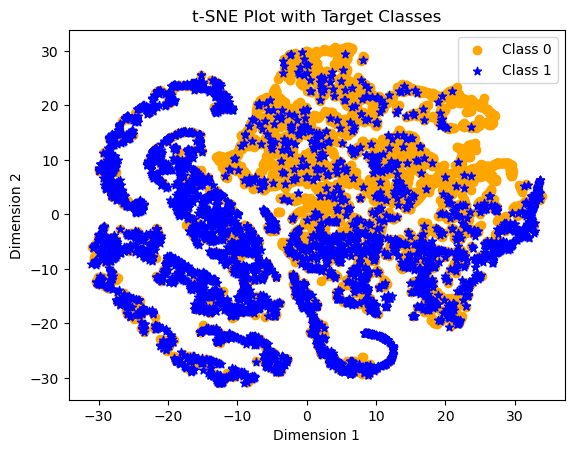

In [895]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42,  n_iter = 400)

tsne_data = tsne.fit_transform(training_data)

tsne_df = pd.DataFrame(tsne_data, columns=['Dimension 1', 'Dimension 2'])
tsne_df['target'] = target

class_colors = ['orange', 'blue']
class_markers = ['o', '*']

for class_value in target.unique():
    class_data = tsne_df[tsne_df['target'] == class_value]
    plt.scatter(class_data['Dimension 1'], class_data['Dimension 2'], 
                c=class_colors[class_value], marker=class_markers[class_value], 
                label=f"Class {class_value}")

plt.title('t-SNE Plot with Target Classes')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()